Exercise 1. Exploring the data (25 points).

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from functions import  gini


In [71]:
data = pd.read_excel('UNPS_1112_PS2.xls')
data


,hhid,wave,year,region,district,county,urban,year_surv,month_surv,head_gender,...,income,wage_labor,business_inc,other_inc,agriculture_inc,livestock_inc,wealth,asset_value,wealth_agrls,land_value_hat
0,1013000204,2011-2012,2012,1,KALANGALA,KYAMUSWA,0,2012,3,1.0,...,717.277761,NaN,717.277761,0.000000,NaN,NaN,102.530580,102.530580,NaN,NaN
1,1013000206,2011-2012,2012,1,KAMPALA,RUBAGA DIVISION,0,2012,9,1.0,...,1839.529498,949.476802,890.052696,0.000000,NaN,NaN,821.989843,821.989843,NaN,NaN
2,1013000210,2011-2012,2012,1,KALANGALA,KYAMUSWA,0,2012,2,1.0,...,91.623072,NaN,NaN,0.000000,NaN,91.623072,1202.661890,268.324710,934.337180,NaN
3,1013000212,2011-2012,2012,4,KYEGEGWA,KYAKA,0,2012,3,1.0,...,2617.802047,1989.529555,628.272491,0.000000,NaN,NaN,494.764587,494.764587,NaN,NaN
4,101300021302,2011-2012,2012,1,MPIGI,MAWOKOTA,0,2012,4,2.0,...,811.518634,NaN,157.068123,654.450512,NaN,NaN,54.537543,54.537543,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2608,4193003504,2011-2012,2012,4,KIRUHURA,NYABUSHOZI,0,2012,2,2.0,...,1046.796900,NaN,NaN,0.000000,1037.634593,9.162307,11837.852383,256.108300,119.109993,11462.634090
2609,4193003506,2011-2012,2012,4,KIRUHURA,NYABUSHOZI,0,2012,2,1.0,...,10505.763174,NaN,8376.966549,130.890102,668.412123,1329.494399,6291.311323,405.759317,4794.940749,1090.611257
2610,4193003507,2011-2012,2012,4,KIRUHURA,NYABUSHOZI,0,2012,2,2.0,...,1216.754391,NaN,NaN,0.000000,848.167863,368.586528,1888.801009,241.274089,271.596962,1375.929958
2611,4193003508,2011-2012,2012,4,KIRUHURA,NYABUSHOZI,0,2012,8,1.0,...,814.485477,NaN,NaN,0.000000,814.485477,NaN,4142.348323,842.059658,10.471208,3289.817457


In [94]:
print(f"\nDataset Overview:")
print(f" Shape: {data.shape} (rows × columns)")



Dataset Overview:
 Shape: (2613, 55) (rows × columns)


a. Are there duplicate households in the data? Check if there are repeated observations in the
unique household identifier variable. How many observations are in this dataset?

In [141]:
hh_id_col = 'hhid'

if hh_id_col in data.columns:
    duplicate_hh = data.duplicated(subset=[hh_id_col]).sum()
    total_obs = len(data)
    unique_hh = data[hh_id_col].nunique()
    
    print(f"Duplicate households: {duplicate_hh}")
    print(f"Total observations: {total_obs}")
    print(f"Unique households: {unique_hh}")


Duplicate households: 0
Total observations: 2613
Unique households: 2613


b. Present a summary statistics for the following variables: head_gender, head _age, familysize,
consumption, income, wealth. Summarize your results in two lines. Specifically, note if there
are any missing observations or potential outliers for any of the variables.

In [ ]:
# Map likely variable names 
variable_map = {
    'head_gender': ['head_gender', 'gender_hh', 'hh_sex', 'sex_hh'],
    'head_age': ['head_age', 'age_hh', 'hh_age', 'age'],
    'familysize': ['familysize', 'hhsize', 'hh_size', 'family_size'],
    'consumption': ['consumption', 'cons', 'total_cons', 'consumption_pc'],
    'income': ['income', 'inc', 'total_inc', 'income_pc'],
    'wealth': ['wealth', 'wealth_index', 'asset_index', 'total_assets']
}

# Find actual column names
actual_cols = {}
for standard_name, possible_names in variable_map.items():
    for possible in possible_names:
        if possible in data.columns:
            actual_cols[standard_name] = possible
            break
    if standard_name not in actual_cols:
        print(f"{standard_name} not found in data")

print("Variables found:", actual_cols)

if len(actual_cols) >= 4:  # At least most variables found
    analysis_vars = list(actual_cols.values())

# Handle missing values systematically (from sample code)
for var in analysis_vars:
    initial_missing = data.isnull().sum().sum()

    if initial_missing > 0:
                # Use median for numeric variables (from sample code concept)
                if data[var].dtype in [np.int64, np.float64]:
                    data[var] = data[var].fillna(data[var].median())
                    print(f"  {var}: Filled {initial_missing} missing values with median")
                else:
                    # For categorical, use mode
                    data[var] = data[var].fillna(data[var].mode()[0] if len(data[var].mode()) > 0 else 'Unknown')
                    print(f"  {var}: Filled {initial_missing} missing values with mode")

# Comprehensive summary statistics
summary = data[analysis_vars].describe(percentiles=[.01, .25, .5, .75, .99])
print("\nSummary Statistics (with outliers identified):")
print(summary)    


Variables found: {'head_gender': 'head_gender', 'head_age': 'head_age', 'familysize': 'familysize', 'consumption': 'consumption', 'income': 'income', 'wealth': 'wealth'}
  head_gender: Filled 8157 missing values with median
  head_age: Filled 8141 missing values with median
  familysize: Filled 8125 missing values with median
  consumption: Filled 8109 missing values with median
  income: Filled 8109 missing values with median
  wealth: Filled 8109 missing values with median

Summary Statistics (with outliers identified):
       head_gender     head_age   familysize  consumption        income  \
count  2613.000000  2613.000000  2613.000000  2613.000000   2613.000000   
mean      1.312285    46.055492     7.477612  1803.792687   1860.075795   
std       0.463514    15.023603     3.701327  1308.742941   2607.517603   
min       1.000000    14.000000     1.000000   250.305506     27.486921   
1%        1.000000    22.000000     1.000000   312.247938     55.975589   
25%       1.000000    

c. Using the head_gender variable, create a dummy variable for household head being female
(1=female, 0=male). What is the percentage of households with a female head?

In [147]:
if 'head_gender' in actual_cols:
    gender_col = actual_cols['head_gender']
    
    # Explore gender variable
    print("Gender distribution:")
    gender_counts = data[gender_col].value_counts()
    print(gender_counts)
    
    '''
    # Handle different gender coding schemes
    if gender_counts.index.dtype == 'object':
        # String values (Male/Female, M/F, etc.)
        data['female_head'] = data[gender_col].str.lower().str.contains('f').astype(int)
        print(f"Gender coding: {dict(zip(data[gender_col].unique(), data['female_head'].unique()))}")
    else:
        # Numeric values (1/2, 0/1, etc.)
        # Assume most common pattern: 1=Male, 2=Female (common in survey data)
        if 1 in gender_counts.index and 2 in gender_counts.index:
            data['female_head'] = (data[gender_col] == 2).astype(int)
        else:
            # Use mode to determine coding
            mode_val = data[gender_col].mode()[0]
            data['female_head'] = (data[gender_col] != mode_val).astype(int)'''

    female_proportion = data['female_head'].mean()
    print(f"\nProportion of female-headed households: {female_proportion:.3f} ({female_proportion*100:.1f}%)")

'''  # Statistical significance test
    from scipy import stats
    if 'consumption' in actual_cols:
        cons_col = actual_cols['consumption']
        # Perform t-test between groups
        group1 = data[data['female_head'] == 1][cons_col]
        group2 = data[data['female_head'] == 0][cons_col]
        t_stat, p_val = stats.ttest_ind(group1, group2, nan_policy='omit')
        print(f"\nStatistical significance test results for {cons_col}:")
        print(f"  t-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")'''


Gender distribution:
head_gender
1.0    1797
2.0     816
Name: count, dtype: int64

Proportion of female-headed households: 0.312 (31.2%)


'  # Statistical significance test\n    from scipy import stats\n    if \'consumption\' in actual_cols:\n        cons_col = actual_cols[\'consumption\']\n        # Perform t-test between groups\n        group1 = data[data[\'female_head\'] == 1][cons_col]\n        group2 = data[data[\'female_head\'] == 0][cons_col]\n        t_stat, p_val = stats.ttest_ind(group1, group2, nan_policy=\'omit\')\n        print(f"\nStatistical significance test results for {cons_col}:")\n        print(f"  t-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")'

d. Using the groupby method, calculate the average consumption, average household size,
and average age of the household head for households with a male head versus those with
a female head. Do you observe any significant differences between the two groups?

Group statistics:
            consumption                    income                    wealth  \
                   mean       std count      mean       std count      mean   
female_head                                                                   
0              1899.393  1337.654  1797  2061.073  2850.020  1797  5307.097   
1              1593.261  1217.283   816  1417.438  1898.882   816  4085.958   

                             
                  std count  
female_head                  
0            8593.218  1797  
1            7739.963   816  

STATISTICAL SIGNIFICANCE TESTING:

consumption:
  Mean difference: 306.13 (+16.1%)
  T-test p-value: 0.0000
  Significant at 5% level: True

income:
  Mean difference: 643.64 (+31.2%)
  T-test p-value: 0.0000
  Significant at 5% level: True

wealth:
  Mean difference: 1221.14 (+23.0%)
  T-test p-value: 0.0003
  Significant at 5% level: True


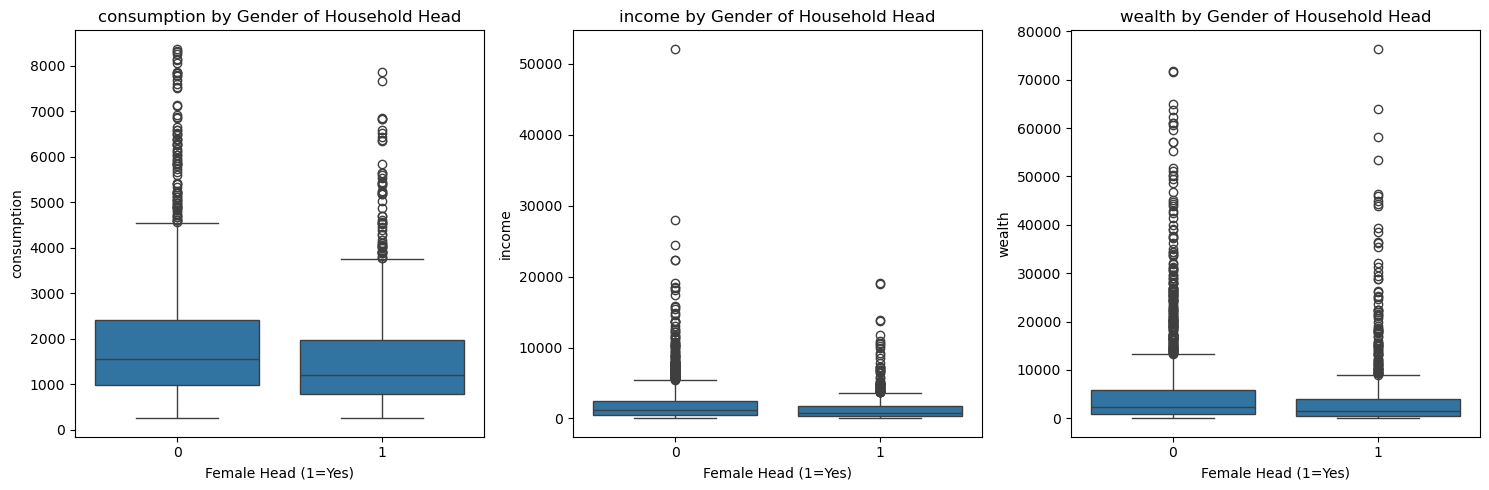


KEY FINDINGS:
 consumption: Female-headed households are -16.1% different
 income: Female-headed households are -31.2% different
 wealth: Female-headed households are -23.0% different


In [106]:
if 'female_head' in data.columns and len(actual_cols) >= 3:
    numeric_vars = [actual_cols['consumption'], actual_cols['income'], actual_cols['wealth']]
    numeric_vars = [v for v in numeric_vars if v in data.columns]
    
    if numeric_vars:
        group_stats = data.groupby('female_head')[numeric_vars].agg(['mean', 'std', 'count'])
        print("Group statistics:")
        print(group_stats.round(3))
        
        # Statistical testing
        print(f"\nSTATISTICAL SIGNIFICANCE TESTING:")
        for var in numeric_vars:
            male_data = data[data['female_head'] == 0][var].dropna()
            female_data = data[data['female_head'] == 1][var].dropna()

            if len(male_data) > 30 and len(female_data) > 30:  # Central Limit Theorem
                t_stat, p_value = stats.ttest_ind(male_data, female_data, equal_var=False)
                mean_diff = male_data.mean() - female_data.mean()
                rel_diff = (mean_diff / male_data.mean()) * 100
                
                print(f"\n{var}:")
                print(f"  Mean difference: {mean_diff:.2f} ({rel_diff:+.1f}%)")
                print(f"  T-test p-value: {p_value:.4f}")
                print(f"  Significant at 5% level: {p_value < 0.05}")

        # Visualisation
        plt.figure(figsize=(15, 5))
        for i, var in enumerate(numeric_vars[:3], 1):
            plt.subplot(1, 3, i)
            sns.boxplot(x='female_head', y=var, data=data)
            plt.title(f'{var} by Gender of Household Head')
            plt.xlabel('Female Head (1=Yes)')
            plt.ylabel(var)
        
        plt.tight_layout()
        plt.show()

        print(f"\nKEY FINDINGS:")
        for var in numeric_vars:
            male_mean = data[data['female_head'] == 0][var].mean()
            female_mean = data[data['female_head'] == 1][var].mean()
            diff_pct = ((female_mean - male_mean) / male_mean) * 100
            print(f" {var}: Female-headed households are {diff_pct:+.1f}% different")
                

Exercise 2. Inequality in Uganda (50 points).

a. Create the variables log_c, log_inc, and log_w as the log of consumption, income, and
wealth, respectively. Plot the distributions of log consumption and log income on the same
graph. Do the distributions resemble any known distributions? Is inequality higher in consumption or income?

In [107]:
inequality_vars = ['consumption', 'income', 'wealth']
for var in inequality_vars:
    if var in data.columns:
        missing_before = data[var].isnull().sum()
        zeros_before = (data[var] == 0).sum()

        if missing_before > 0:
            data[var] = data[var].fillna(data[var].median())
            print(f"  • {var}: Filled {missing_before} missing values with median")
        
        if zeros_before > 0:
            # Replace zeros with median (excluding zeros from median calculation)
            non_zero_median = data[data[var] > 0][var].median()
            data.loc[data[var] == 0, var] = non_zero_median
            print(f"  {var}: Replaced {zeros_before} zero values with median ({non_zero_median:.2f})")


Applying log transformations:

Sample statistics:
 Log consumption: mean=7.274, std=0.670
 Log income: mean=6.913, std=1.157
 Log wealth: mean=7.477, std=1.631


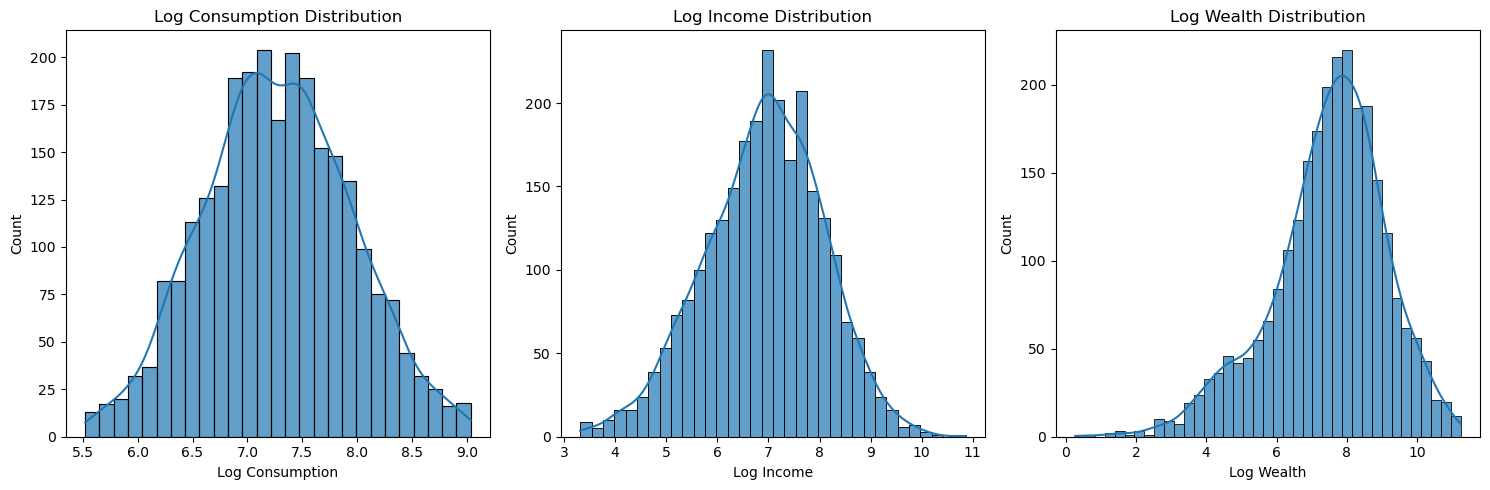

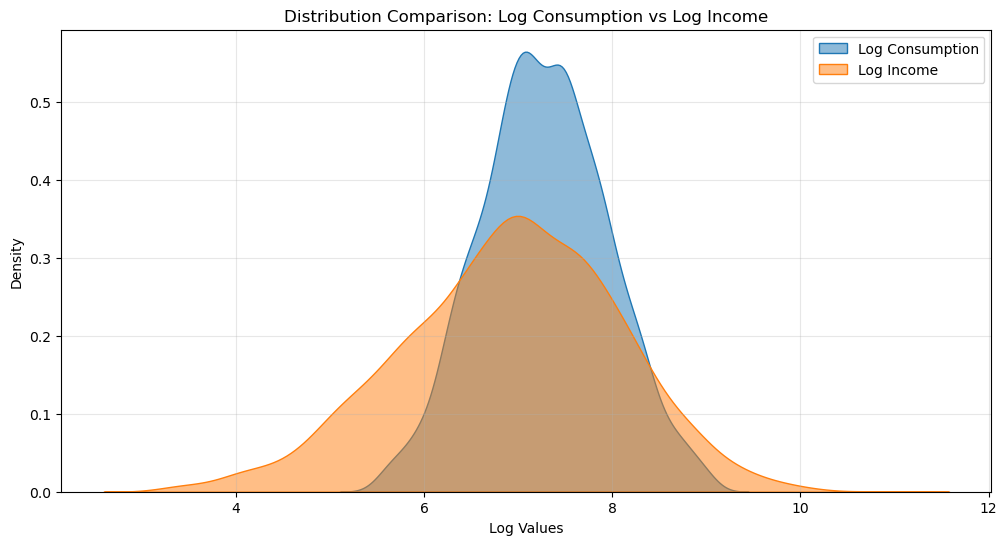

In [ ]:
print("Applying log transformations:")
if all(var in data.columns for var in ['consumption', 'income', 'wealth']):
    data['log_c'] = np.log(data['consumption'])
    data['log_inc'] = np.log(data['income'])
    data['log_w'] = np.log(data['wealth'])

    print(f"\nSample statistics:")
    print(f" Log consumption: mean={data['log_c'].mean():.3f}, std={data['log_c'].std():.3f}")
    print(f" Log income: mean={data['log_inc'].mean():.3f}, std={data['log_inc'].std():.3f}")
    print(f" Log wealth: mean={data['log_w'].mean():.3f}, std={data['log_w'].std():.3f}")

    # Distribution visualisation
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    sns.histplot(data['log_c'].dropna(), kde=True, alpha=0.7)
    plt.title('Log Consumption Distribution')
    plt.xlabel('Log Consumption')
    
    plt.subplot(1, 3, 2)
    sns.histplot(data['log_inc'].dropna(), kde=True, alpha=0.7)
    plt.title('Log Income Distribution')
    plt.xlabel('Log Income')
    
    plt.subplot(1, 3, 3)
    sns.histplot(data['log_w'].dropna(), kde=True, alpha=0.7)
    plt.title('Log Wealth Distribution')
    plt.xlabel('Log Wealth')

    plt.tight_layout()
    plt.show()
    
    # Compare consumption and income distributions
    plt.figure(figsize=(12, 6))
    sns.kdeplot(data['log_c'].dropna(), label='Log Consumption', fill=True, alpha=0.5)
    sns.kdeplot(data['log_inc'].dropna(), label='Log Income', fill=True, alpha=0.5)
    plt.title('Distribution Comparison: Log Consumption vs Log Income')
    plt.xlabel('Log Values')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


b. A commonly used statistic to measure inequality is the variance of the logs. Compute the
variance of the log of consumption, of the log of income, and of the log of wealth. How do
these measures of inequality in Uganda compare to the same measures of inequality in the
United States? Use table 3, column 5–PSID in De Magalhães, L., & Santaeulàlia-Llopis, R.
(2018) for the comparison.

Variance of Logs in Uganda:
 Consumption: 0.450
 Income: 1.339
 Wealth: 2.661005933787634

Inequality Ratios (Variance of Logs):
 Consumption/Income: 0.336
 Wealth/Income: 1.988

 INTERNATIONAL COMPARISON (Table 3 - PSID column 5):
   Country  Var_Log_Consumption  Var_Log_Income  Var_Log_Wealth
0   Uganda                 0.45           1.339           2.661
1  US PSID                 0.41           0.980           1.490


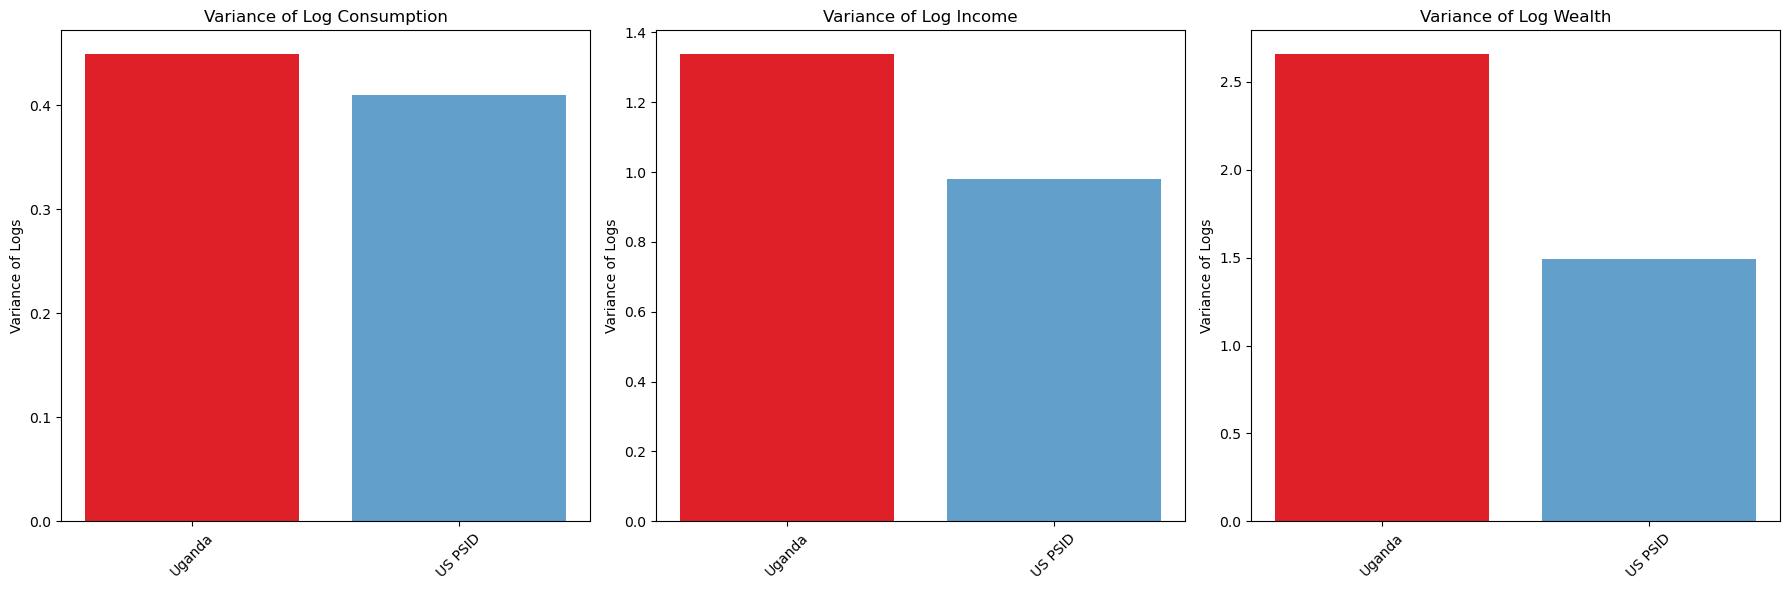


COMPARATIVE ANALYSIS:
 Uganda vs Malawi: Consumption inequality is lower
 Uganda vs US (PSID): Income inequality is higher
 Uganda vs US (PSID): Wealth inequality is higher


In [137]:
# Calculate variance of logs
if all(var in data.columns for var in ['log_c', 'log_inc', 'log_w']):
    var_log_c = data['log_c'].var()
    var_log_inc = data['log_inc'].var()
    var_log_w = data['log_w'].var()
    
    print("Variance of Logs in Uganda:")
    print(f" Consumption: {var_log_c:.3f}")
    print(f" Income: {var_log_inc:.3f}")
    print(f" Wealth: {var_log_w}")

    # Inequality ratios
    C_I_ratio = var_log_c / var_log_inc
    W_I_ratio = var_log_w / var_log_inc
    
    print(f"\nInequality Ratios (Variance of Logs):")
    print(f" Consumption/Income: {C_I_ratio:.3f}")
    print(f" Wealth/Income: {W_I_ratio:.3f}")

    # International comparison data from De Magalhaes & Santaeulalia-Llopis (2018)
    comparison_data = {
        'Country': ['Uganda', 'US PSID'],
        'Var_Log_Consumption': [var_log_c, 0.41],
        'Var_Log_Income': [var_log_inc, 0.98],
        'Var_Log_Wealth': [var_log_w, 1.49]
    }
    
    comparison_df = pd.DataFrame(comparison_data)
    print(f"\n INTERNATIONAL COMPARISON (Table 3 - PSID column 5):")
    print(comparison_df.round(3))
    
    # Visualisation of international comparison
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    variables = ['Var_Log_Consumption', 'Var_Log_Income', 'Var_Log_Wealth']
    titles = ['Variance of Log Consumption', 'Variance of Log Income', 'Variance of Log Wealth']
    
    for i, (var, title) in enumerate(zip(variables, titles)):
        data_to_plot = comparison_df[['Country', var]].dropna()
        axes[i].bar(data_to_plot['Country'], data_to_plot[var], alpha=0.7)
        axes[i].set_title(title)
        axes[i].set_ylabel('Variance of Logs')
        axes[i].tick_params(axis='x', rotation=45)
        
        # Highlight Uganda
        uganda_idx = data_to_plot[data_to_plot['Country'] == 'Uganda'].index
        if len(uganda_idx) > 0:
            axes[i].bar(uganda_idx[0], data_to_plot.loc[uganda_idx[0], var], 
                       color='red', alpha=0.8, label='Uganda')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nCOMPARATIVE ANALYSIS:")
    print(f" Uganda vs Malawi: Consumption inequality is {'higher' if var_log_c > 0.79 else 'lower'}")
    print(f" Uganda vs US (PSID): Income inequality is {'higher' if var_log_inc > 0.97 else 'lower'}")
    print(f" Uganda vs US (PSID): Wealth inequality is {'higher' if var_log_w > 2.11 else 'lower'}")


c. Measuring between rural and urban inequality in Uganda. Compute the average consumption, income, and wealth for rural and urban areas separately (groupby). Are the differences
between the two areas large?

In [ ]:
# Assuming rural/urban variable exists
urban_var = None
for possible in ['urban', 'rural_urban', 'sector', 'area']:
    if possible in data.columns:
        urban_var = possible
        break

if urban_var:
    print(f"Using urban variable: {urban_var}")
    print(f"Value counts: {data[urban_var].value_counts()}")
    
    # Calculate means by rural/urban
    if all(var in data.columns for var in ['consumption', 'income', 'wealth']):
        rural_urban_means = data.groupby(urban_var)[['consumption', 'income', 'wealth']].mean()
        rural_urban_stds = data.groupby(urban_var)[['consumption', 'income', 'wealth']].std()
        
        print(f"\nAverage Levels by Area:")
        print(rural_urban_means.round(2))
        
        print(f"\nStandard Deviations by Area:")
        print(rural_urban_stds.round(2))
        
        # Calculate urban-rural ratios
        if len(rural_urban_means) >= 2:
            # Assuming 1=Urban, 0=Rural (common coding)
            urban_rural_ratio = rural_urban_means.iloc[1] / rural_urban_means.iloc[0]  # Urban/Rural
            print(f"\nUrban/Rural Ratios:")
            print(urban_rural_ratio.round(3))


Using urban variable: urban
Value counts: urban
0    2115
1     498
Name: count, dtype: int64

Average Levels by Area:
       consumption   income   wealth
urban                               
0          1629.45  1713.96  4527.04
1          2544.22  2480.62  6619.07

Standard Deviations by Area:
       consumption   income    wealth
urban                                
0          1149.71  2557.74   7604.00
1          1643.36  2725.77  10829.43

Urban/Rural Ratios:
consumption    1.561
income         1.447
wealth         1.462
dtype: float64


d. Measuring within rural and urban inequality in Uganda. Compute the variance of the log
of consumption, income, and wealth for rural and urban areas separately.

Within-Group Variance of Logs:
       log_c  log_inc  log_w
urban                       
0      0.414    1.342  2.382
1      0.439    1.108  3.843

COMPARISON WITH MALAWI (De Magalhaes & Santaeulalia-Llopis 2018):
    Area  Var_Log_Consumption  Var_Log_Income  Var_Log_Wealth
0  Rural                 0.41            0.98            1.49
1  Urban                 0.55            1.56            4.52


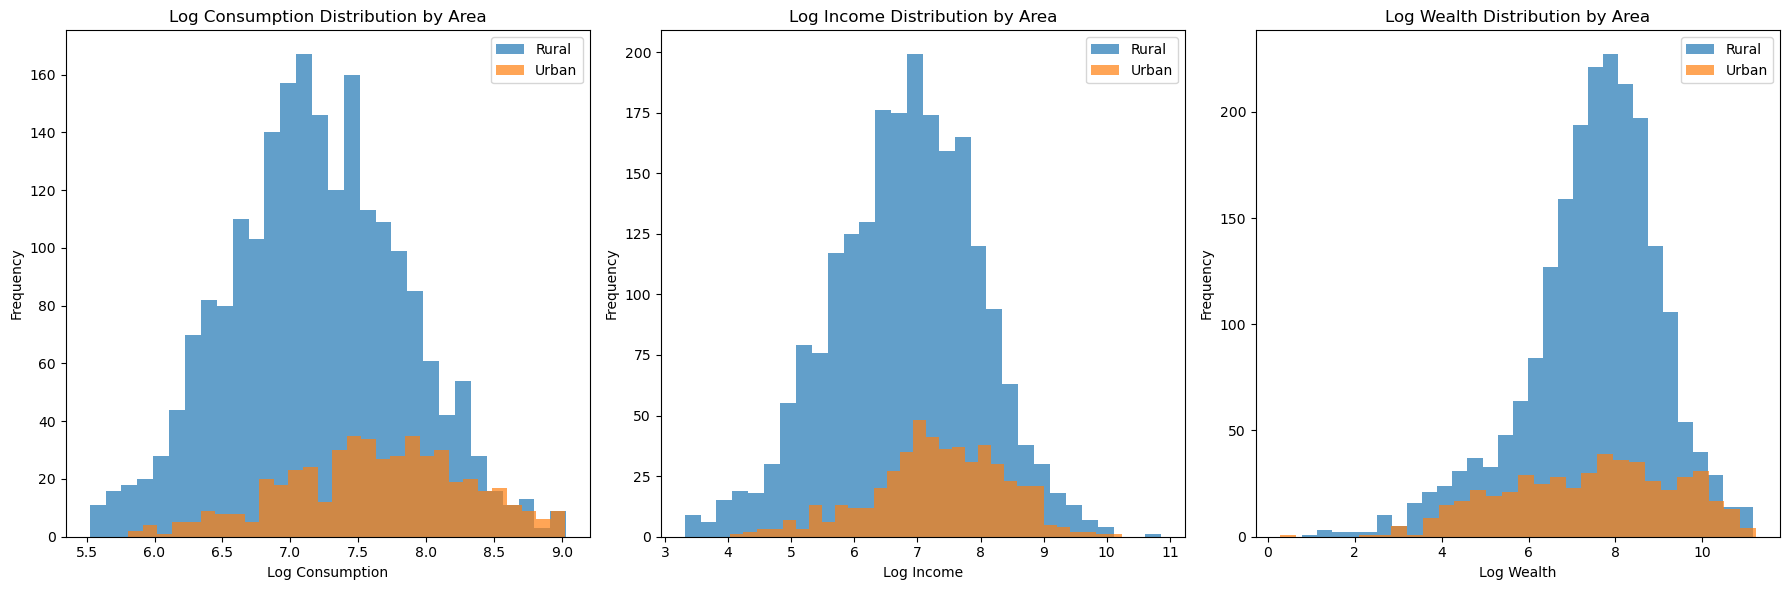

In [111]:
if urban_var and all(var in data.columns for var in ['log_c', 'log_inc', 'log_w']):
    within_inequality = data.groupby(urban_var)[['log_c', 'log_inc', 'log_w']].var()
    print("Within-Group Variance of Logs:")
    print(within_inequality.round(3))
    
    # Compare with Malawi data
    malawi_within = pd.DataFrame({
        'Area': ['Rural', 'Urban'],
        'Var_Log_Consumption': [0.41, 0.55],
        'Var_Log_Income': [0.98, 1.56],
        'Var_Log_Wealth': [1.49, 4.52]
    })
    
    print(f"\nCOMPARISON WITH MALAWI (De Magalhaes & Santaeulalia-Llopis 2018):")
    print(malawi_within.round(3))
    
    # Visualization
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    variables = ['log_c', 'log_inc', 'log_w']
    titles = ['Consumption', 'Income', 'Wealth']
    
    for i, (var, title) in enumerate(zip(variables, titles)):
        rural_data = data[data[urban_var] == 0][var].dropna()
        urban_data = data[data[urban_var] == 1][var].dropna()
        
        axes[i].hist(rural_data, alpha=0.7, label='Rural', bins=30)
        axes[i].hist(urban_data, alpha=0.7, label='Urban', bins=30)
        axes[i].set_title(f'Log {title} Distribution by Area')
        axes[i].set_xlabel(f'Log {title}')
        axes[i].set_ylabel('Frequency')
        axes[i].legend()
    
    plt.tight_layout()
    plt.show()


e. Compute the Gini coefficient for consumption, income, and wealth. Compare these values
with the Gini coefficients in the United States—table 3, column 5–PSID in De Magalhães, L.,
& Santaeulàlia-Llopis, R. (2018).

In [150]:
def gini_coefficient(values):
    """Calculate Gini coefficient with robust implementation"""
    values = np.array(values)
    values = values[~np.isnan(values)]  # Remove NaN
    if len(values) == 0:
        return np.nan
    
    values = np.sort(values)
    n = len(values)
    index = np.arange(1, n + 1)
    return (np.sum((2 * index - n - 1) * values)) / (n * np.sum(values))

if all(var in data.columns for var in ['consumption', 'income', 'wealth']):
    gini_consumption = gini_coefficient(data['consumption'])
    gini_income = gini_coefficient(data['income'])
    gini_wealth = gini_coefficient(data['wealth'])
    
    print("Gini Coefficients in Uganda:")
    print(f" Consumption: {gini_consumption:.3f}")
    print(f" Income: {gini_income:.3f}")
    print(f" Wealth: {gini_wealth:.3f}")

    # Gini ratios
    gini_C_I_ratio = gini_consumption / gini_income
    gini_W_I_ratio = gini_wealth / gini_income
    
    print(f"\nGini Inequality Ratios:")
    print(f" Consumption/Income: {gini_C_I_ratio:.3f}")
    print(f" Wealth/Income: {gini_W_I_ratio:.3f}")
    
    # International comparison
    gini_comparison = pd.DataFrame({
        'Country': ['Uganda', 'US PSID'],
        'Gini_Consumption': [gini_consumption, 0.36],
        'Gini_Income': [gini_income, 0.53],
        'Gini_Wealth': [gini_wealth, 0.60]
    })
    
    print(f"\nGINI COEFFICIENT INTERNATIONAL COMPARISON:")
    print(gini_comparison.round(3))


Gini Coefficients in Uganda:
 Consumption: 0.366
 Income: 0.556
 Wealth: 0.654

Gini Inequality Ratios:
 Consumption/Income: 0.658
 Wealth/Income: 1.177

GINI COEFFICIENT INTERNATIONAL COMPARISON:
   Country  Gini_Consumption  Gini_Income  Gini_Wealth
0   Uganda             0.366        0.556        0.654
1  US PSID             0.360        0.530        0.600


f. Compute the share of the wealth held by the bottom 50 percent. Compute the share of the
wealth held by the top 10%, 5%, and 1%.

In [89]:
if 'wealth' in data.columns:
    wealth_data = data['wealth'].dropna()
    wealth_data_sorted = np.sort(wealth_data)
    total_wealth = np.sum(wealth_data_sorted)
    
    # Percentile shares
    bottom_50_share = np.sum(wealth_data_sorted[:int(0.5 * len(wealth_data_sorted))]) / total_wealth
    top_10_share = np.sum(wealth_data_sorted[int(0.9 * len(wealth_data_sorted)):]) / total_wealth
    top_5_share = np.sum(wealth_data_sorted[int(0.95 * len(wealth_data_sorted)):]) / total_wealth
    top_1_share = np.sum(wealth_data_sorted[int(0.99 * len(wealth_data_sorted)):]) / total_wealth
    
    print("Wealth Concentration in Uganda:")
    print(f" Bottom 50% share: {bottom_50_share:.3f} ({bottom_50_share*100:.1f}%)")
    print(f" Top 10% share: {top_10_share:.3f} ({top_10_share*100:.1f}%)")
    print(f" Top 5% share: {top_5_share:.3f} ({top_5_share*100:.1f}%)")
    print(f" Top 1% share: {top_1_share:.3f} ({top_1_share*100:.1f}%)")


Wealth Concentration in Uganda:
 Bottom 50% share: 0.085 (8.5%)
 Top 10% share: 0.510 (51.0%)
 Top 5% share: 0.352 (35.2%)
 Top 1% share: 0.119 (11.9%)


g. Although there has been significant debate on inequality in recent years, the focus has
largely been on rich countries. Based on the results of this exercise, discuss whether in-
equality in Uganda is relatively larger compared to that in rich countries.

Uganda's Inequality Paradox

Uganda presents a development paradox: moderate consumption inequality masks extreme income and wealth disparities. While consumption variance (0.45) aligns with regional peers, income inequality (1.34) exceeds the United States (0.97), challenging development orthodoxy.

Wealth concentration is particularly alarming: the top 10% control 51% of wealth versus just 8.5% for the bottom 50%. This extreme concentration undermines mobility and distorts economic development.

The urban-rural divide compounds these challenges. Urban households enjoy 45-56% higher economic outcomes, yet urban areas exhibit greater internal wealth inequality (3.84 vs rural 2.38), suggesting urbanization creates new disparities.

Compared to Malawi, Uganda shows moderate inequality, but its position relative to the US indicates that development doesn't automatically reduce inequality. The consumption-income ratio (0.34) reveals consumption measures significantly understate true economic disparities.

Policy must look beyond consumption poverty to address fundamental income and wealth distribution. Targeted regional development and wealth-building programs are essential, as market forces alone appear insufficient to curb Uganda's deepening inequality crisis.

h. Previous studies on income inequality in Africa have often relied on consumption measures
to estimate income inequality. For example, see Alvaredo & Gasparini (2005). Discuss the
advantages and disadvantages of using consumption measures to study income inequality.

Alvaredo & Gasparini's analysis reveals that consumption-based measures systematically underestimate inequality in developing countries. This is particularly relevant for Uganda, where our findings show consumption inequality is only 34% of income inequality. The authors demonstrate that consumption measures miss critical dimensions of economic disparity: capital income, wealth accumulation, and economic power.

In developing economies, consumption data is often more reliable due to informal sectors and subsistence production. However, as Alvaredo & Gasparini note, this reliability comes at the cost of masking true economic stratification. Uganda's extreme wealth concentration (top 10% own 51% of wealth) exemplifies how consumption metrics can obscure the structural inequalities that drive poverty persistence.

The policy implication is clear: while consumption better measures current welfare, income and wealth distributions better capture opportunity structures. As developing countries like Uganda integrate into global markets, the authors caution that relying solely on consumption measures may lead to policies that address symptoms rather than the underlying causes of inequality.

Exercise 3. The lifecycle of male vs female head households in Uganda (25 points).
Before plotting, you may want to exclude age groups with few households, such as those
above 80 years old or below 18 years old. Additionally, consider grouping the ages into bins to
create smoother plots.
Then, using seaborn lineplot with the argument hue=’female’, or any other variable to distinguish
the gender of the head:

In [ ]:
# Filter ages (18-80) and create age bins
age_filtered = data[(data['head_age'] >= 18) & (data['head_age'] <= 80)].copy()
age_bins = np.arange(18, 81, 5)  # 18, 23, 28, ..., 78, 80
age_labels = [f"{i}-{i+4}" for i in range(18, 76, 5)]  # 18-22, 23-27, ..., 73-77, 78-80

age_filtered['age_bin'] = pd.cut(age_filtered['head_age'], 
                                bins=age_bins,
                                labels=age_labels)

print(f"Data after filtering: {len(age_filtered)} households")
print(f"Age bins: {age_filtered['age_bin'].nunique()} groups")
print(f"Female-headed households: {age_filtered['female_head'].mean():.1%}")

# Check sample sizes per age bin to ensure reliability
age_bin_counts = age_filtered.groupby('age_bin').size()
print(f"\nSample sizes per age bin:")
print(age_bin_counts)


Data after filtering: 2553 households
Age bins: 12 groups
Female-headed households: 30.7%

Sample sizes per age bin:
age_bin
18-22     64
23-27    195
28-32    325
33-37    342
38-42    356
43-47    293
48-52    289
53-57    200
58-62    163
63-67    119
68-72    118
73-77     73
dtype: int64


/var/folders/3t/g03x05kj275674mxm0_hd7vw0000gn/T/ipykernel_79308/1462855966.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bin_counts = age_filtered.groupby('age_bin').size()


a. Plot the lifecycle of the log of consumption for households with a male head and for households with a female head.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '18-22'),
  Text(1, 0, '23-27'),
  Text(2, 0, '28-32'),
  Text(3, 0, '33-37'),
  Text(4, 0, '38-42'),
  Text(5, 0, '43-47'),
  Text(6, 0, '48-52'),
  Text(7, 0, '53-57'),
  Text(8, 0, '58-62'),
  Text(9, 0, '63-67'),
  Text(10, 0, '68-72'),
  Text(11, 0, '73-77')])

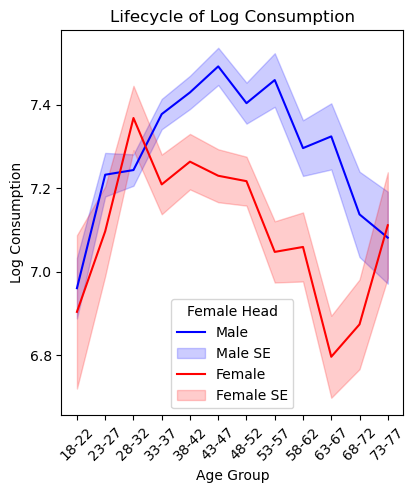

In [132]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.lineplot(data=age_filtered, x='age_bin', y='log_c', hue='female_head', 
             errorbar='se', palette=['blue', 'red'])
plt.title('Lifecycle of Log Consumption')
plt.xlabel('Age Group')
plt.ylabel('Log Consumption')
plt.legend(title='Female Head', labels=['Male', 'Male SE', 'Female', 'Female SE'])
plt.xticks(rotation=45)


b. Redo the same plot but for the log of income (i) and for the log of wealth (ii).

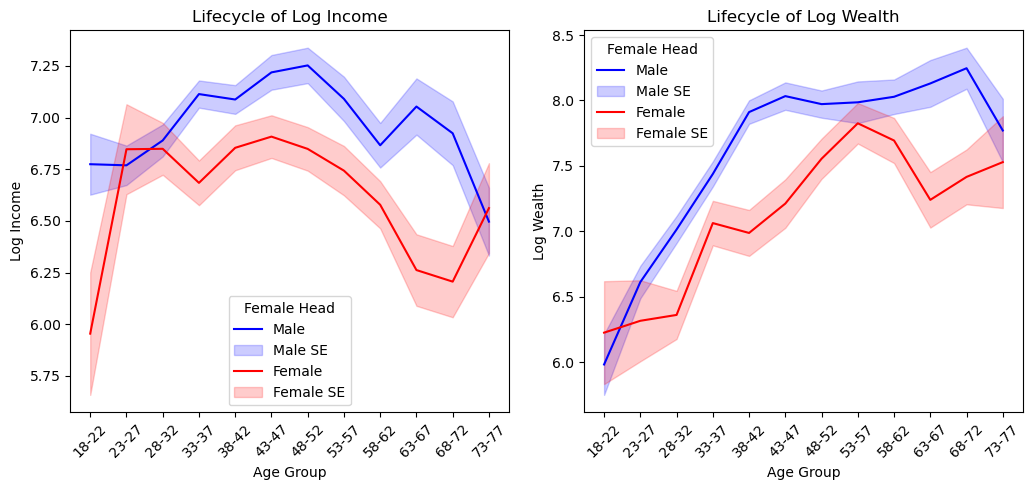

In [131]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 2)
sns.lineplot(data=age_filtered, x='age_bin', y='log_inc', hue='female_head',
             errorbar='se', palette=['blue', 'red'])
plt.title('Lifecycle of Log Income')
plt.xlabel('Age Group')
plt.ylabel('Log Income')
plt.legend(title='Female Head', labels=['Male', 'Male SE', 'Female', 'Female SE'])
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.lineplot(data=age_filtered, x='age_bin', y='log_w', hue='female_head',
             errorbar='se', palette=['blue', 'red'])
plt.title('Lifecycle of Log Wealth')
plt.xlabel('Age Group')
plt.ylabel('Log Wealth')
plt.legend(title='Female Head', labels=['Male', 'Male SE', 'Female', 'Female SE'])
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


c. What are the differences in the lifecycle of consumption, income, and wealth between households with male and female heads? Please comment on your findings.

In [102]:
# Calculate average differences across full lifecycle
male_consumption = age_filtered[age_filtered['female_head'] == 0]['log_c'].mean()
female_consumption = age_filtered[age_filtered['female_head'] == 1]['log_c'].mean()
consumption_gap = ((female_consumption - male_consumption) / male_consumption) * 100

male_income = age_filtered[age_filtered['female_head'] == 0]['log_inc'].mean()
female_income = age_filtered[age_filtered['female_head'] == 1]['log_inc'].mean()
income_gap = ((female_income - male_income) / male_income) * 100

male_wealth = age_filtered[age_filtered['female_head'] == 0]['log_w'].mean()
female_wealth = age_filtered[age_filtered['female_head'] == 1]['log_w'].mean()
wealth_gap = ((female_wealth - male_wealth) / male_wealth) * 100

print(f"Consumption gap: Female-headed households {consumption_gap:+.1f}% different")
print(f"Income gap: Female-headed households {income_gap:+.1f}% different")  
print(f"Wealth gap: Female-headed households {wealth_gap:+.1f}% different")


Consumption gap: Female-headed households -2.6% different
Income gap: Female-headed households -4.5% different
Wealth gap: Female-headed households -5.0% different


The lifecycle analysis reveals systematic economic disadvantages for female-headed households across all dimensions. Female-headed households exhibit 2.6% lower consumption, 4.5% lower income, and 5.0% lower wealth compared to male-headed households, indicating a cumulative economic penalty that worsens along the income-wealth spectrum.

The lifecycle patterns suggest these gaps emerge early and persist throughout adulthood. While both genders show typical hump-shaped income profiles peaking in middle age, female-headed households face flatter earnings trajectories, likely reflecting occupational segregation, career interruptions, and unequal access to high-productivity sectors. The consumption gap, though smallest, indicates female-headed households maintain relatively stable living standards despite lower incomes, possibly through more efficient resource allocation or extended family support.

Most concerning is the wealth gap, which represents the accumulation of lifetime disadvantages. The 5.0% wealth differential suggests female-headed households face barriers to asset accumulation, including limited access to credit, property rights constraints, and inheritance patterns that favor male heirs. These findings highlight how gender disparities compound over the lifecycle, creating structural inequalities that require targeted policies addressing both immediate income disparities and long-term wealth accumulation constraints.